Min Distance to Cross from Origin 266
Min Distance to Cross by Wire Length 19242


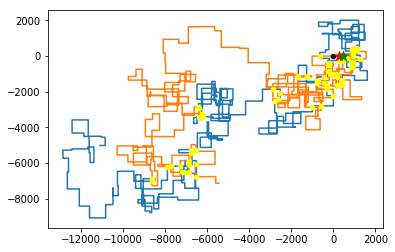

In [16]:
import matplotlib.pyplot as plt
import sys

with open('day3-input', 'r') as wpf:
    wpsl = wpf.readlines()

#wpsl = ["R8,U5,L5,D3", "U7,R6,D4,L4"] #6 #30
#wpsl = ["R75,D30,R83,U83,L12,D49,R71,U7,L72", "U62,R66,U55,R34,D71,R55,D58,R83"] #159 #610
#wpsl = ["R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51", "U98,R91,D20,R16,D67,R40,U7,R15,U6,R7"] #135 #410

def to_wire_path(wire_path_source):
    wire_path = wire_path_source.split(',')
    for wire_segment in wire_path:
        d = wire_segment[0].lower()
        l = int(wire_segment[1:])
        yield (d, l)
    
def to_wire_points(wire_path):
    def next_point(lst, nxt):
        lstx, lsty = lst
        nxtx, nxty = nxt
        if lstx == nxtx:
            if lsty > nxty:
                for y in range(lsty - 1, nxty - 1, -1):
                    yield (lstx, y)
            else:
                for y in range(lsty + 1, nxty + 1, 1):
                    yield (lstx, y)
        elif lsty == nxty:
            if lstx > nxtx:
                for x in range(lstx - 1, nxtx - 1, -1):
                    yield (x, lsty)
            else:
                for x in range(lstx + 1, nxtx + 1, 1):
                    yield (x, lsty)
                
    first = (0, 0)
    yield first
    last = first
    for ws in wire_path:
        d,l = ws
        nx, ny = last
        if d == 'r':
            nx = nx + l
        elif d == 'l':
            nx = nx - l
        elif d == 'u':
            ny = ny + l
        elif d == 'd':
            ny = ny - l
        next = (nx, ny)
        for np in next_point(last, next):
            yield np
        last = next
                
def find_wire_crosses(wire_paths):
    wire_points = set(wire_paths[0][1:])
    for wire_path in wire_paths[1:]:
        current_wire_points = set(wire_path[1:])
        for wire_point in current_wire_points:
            if wire_point in wire_points:
                yield wire_point
        wire_points.union(current_wire_points)

# parse input
wire_paths = []
for wps in wpsl:
    wire_path = to_wire_path(wps)
    wire_paths.append(list(to_wire_points(wire_path)))
   
# mark origin
plt.scatter(0, 0, color='black', marker='o', s=20, zorder=3)

# mark all wire crosses
wire_crosses = list(find_wire_crosses(wire_paths))
ix = []
iy = []
for wire_cross in wire_crosses:
    ix.append(wire_cross[0])
    iy.append(wire_cross[1])
plt.scatter(ix, iy, color='yellow', marker='o', s=20, zorder=2)

# plot wire paths
for wire_path in wire_paths:
    x = []
    y = []
    for wire_point in wire_path:
        x.append(wire_point[0])
        y.append(wire_point[1])
    plt.plot(x, y, zorder=1)

# mark wire cross closest to central port (origin) by absolute distance
min_abs_cross = None
min_abs_distance = sys.maxsize
for wire_cross in wire_crosses:
    wire_cross_distance = sum(map(abs, wire_cross))
    if wire_cross_distance < min_abs_distance:
        min_abs_distance = wire_cross_distance
        min_abs_cross = wire_cross
print('Min Distance to Cross from Origin', min_abs_distance)
minabsx, minabsy = min_abs_cross
plt.scatter(minabsx, minabsy, color='red', marker='*', s=100, zorder=4)

# mark wire cross closest to central port (origin) by wire length
min_len_cross = None
min_len_distance = sys.maxsize
for wire_cross in wire_crosses:
    wire_cross_distance = None
    for wire_path in wire_paths:
        wire_path_distance = wire_path.index(wire_cross)
        wire_cross_distance = (wire_cross_distance or 0) + wire_path_distance
    if wire_cross_distance and wire_cross_distance < min_len_distance:
        min_len_distance = wire_cross_distance
        min_len_cross = wire_cross
print('Min Distance to Cross by Wire Length', min_len_distance)
minlenx, minleny = min_len_cross
plt.scatter(minlenx, minleny, color='green', marker='*', s=100, zorder=4)

plt.show()